In [60]:
import sympy as sp
from sympy import cos as c, sin as s, pi, Function as f, Matrix as M
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the independent variable
x, y, t, l1, l2, m1, m2 = sp.symbols("x y t l1 l2 m1 m2")
L1, L2, g = sp.symbols("L1 L2 g")
q1, q2 = f("q1")(t), f("q2")(t)
c1, s1, c2, s2, c12, s12 = c(q1), s(q1), c(q2), s(q2), c(q1 + q2), s(q1 + q2)
t_diff = lambda expr: sp.diff(expr, t) if t in expr.free_symbols else expr

# Define the forward kinematics
R1 = M([[c1, -s1, 0], [s1, c1, 0], [0, 0, 1]])
T1 = M([[1, 0, l1], [0, 1, 0], [0, 0, 1]])
R2 = M([[c2, -s2, 0], [s2, c2, 0], [0, 0, 1]])
T2 = M([[1, 0, l2], [0, 1, 0], [0, 0, 1]])
Q01 = R1 * T1
Q12 = R2 * T2
Q02 = Q01 * Q12
Q02 = Q02.applyfunc(sp.simplify)
Ph = M([[x], [0], [1]])

dq1 = q1.diff(t)
dq2 = q2.diff(t)
ddq1 = dq1.diff(t)
ddq2 = dq2.diff(t)
tau1, tau2 = sp.symbols("tau1 tau2")

$$\frac{d}{dt}\frac{\partial L}{\partial \dot{q}_i} - \frac{\partial L}{\partial q_i} = \tau_i$$
$$M(q)\ddot{q} + C(q,\dot{q})\dot{q} + G(q) = \tau$$


In [61]:
m_t = M(
    [
        [
            m1 * L1**2 + m2 * (L1**2 + 2 * L1 * L2 * c2 + L2**2),
            m2 * (L1 * L2 * c2 + L2**2),
        ],
        [m2 * (L1 * L2 * c2 + L2**2), m2 * L2**2],
    ]
)
c_t_td = M(
    [[-m2 * L1 * L2 * s2 * (2 * dq1 * dq2 * dq2**2)], [m2 * L1 * L2 * s2 * dq1**2]]
)
g_t = M(
    [
        [(m1 + m2) * g * L1 * c(q1) + m2 * g * L2 * c(q1 + q2)],
        [m2 * g * L2 * c(q1 + q2)],
    ]
)

In [62]:
m_t.inv()


Matrix([
[                             1/(L1**2*m1 - L1**2*m2*cos(q2(t))**2 + L1**2*m2),                                                      (-L1*cos(q2(t)) - L2)/(L1**2*L2*m1 - L1**2*L2*m2*cos(q2(t))**2 + L1**2*L2*m2)],
[(-L1*cos(q2(t)) - L2)/(L1**2*L2*m1 - L1**2*L2*m2*cos(q2(t))**2 + L1**2*L2*m2), (L1**2*m1 + L1**2*m2 + 2*L1*L2*m2*cos(q2(t)) + L2**2*m2)/(L1**2*L2**2*m1*m2 - L1**2*L2**2*m2**2*cos(q2(t))**2 + L1**2*L2**2*m2**2)]])

In [63]:
eq = m_t.inv() * (-c_t_td - g_t - M([[tau1], [tau2]]))
eq = eq.applyfunc(sp.simplify)


In [64]:
eq


Matrix([
[                                                                   (L2*(2*L1*L2*m2*sin(q2(t))*Derivative(q1(t), t)*Derivative(q2(t), t)**3 - L1*g*(m1 + m2)*cos(q1(t)) - L2*g*m2*cos(q1(t) + q2(t)) - tau1) + (L1*cos(q2(t)) + L2)*(L1*L2*m2*sin(q2(t))*Derivative(q1(t), t)**2 + L2*g*m2*cos(q1(t) + q2(t)) + tau2))/(L1**2*L2*(m1 + m2*sin(q2(t))**2))],
[(L2*m2*(L1*cos(q2(t)) + L2)*(-2*L1*L2*m2*sin(q2(t))*Derivative(q1(t), t)*Derivative(q2(t), t)**3 + L1*g*(m1 + m2)*cos(q1(t)) + L2*g*m2*cos(q1(t) + q2(t)) + tau1) - (L1*L2*m2*sin(q2(t))*Derivative(q1(t), t)**2 + L2*g*m2*cos(q1(t) + q2(t)) + tau2)*(L1**2*m1 + L1**2*m2 + 2*L1*L2*m2*cos(q2(t)) + L2**2*m2))/(L1**2*L2**2*m2*(m1 + m2*sin(q2(t))**2))]])

In [65]:
# sols = sp.solve(eq, [ddq1, ddq2], rational=True, simplify=True)
# ddq1_sol = sols[ddq1]
# ddq2_sol = sols[ddq2]
sols = eq
ddq1_sol = sols[0]
ddq2_sol = sols[1]

> convert to state npace form:

Assume $x=\begin{bmatrix} q & \dot{q} \end{bmatrix}^T$, then we have:

$$
\begin{bmatrix}x_1 \\ x_2 \\ x_3 \\ x_4\end{bmatrix} = \begin{bmatrix} q_1 \\ q_2 \\ \dot{q}_1 \\ \dot{q}_2 \end{bmatrix}
\Longrightarrow
\begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \\ \dot{x}_3 \\ \dot{x}_4\end{bmatrix} = \begin{bmatrix} x_3 \\ x_4 \\ \ddot{q}_1 \\ \ddot{q}_2 \end{bmatrix} = \begin{bmatrix} x_3 \\ x_4 \\ M(q)^{-1}(\tau - C(q,\dot{q})\dot{q} - G(q)) \end{bmatrix}
$$

In other words, we have:
$$\dot{x} = \begin{bmatrix} \dot{q} \\ M(q)^{-1}(\tau - C(q,\dot{q})\dot{q} - G(q)) \end{bmatrix}$$


In [66]:
x1, x2, x3, x4 = sp.symbols("x1 x2 x3 x4", cls=sp.Function)
x1, x2, x3, x4 = x1(t), x2(t), x3(t), x4(t)
# x1_d, x2_d, x3_d, x4_d = sp.symbols(r'\dot{x}_1 \dot{x}_2 \dot{x}_3 \dot{x}_4')
# x = M([x1, x2, x3, x4])
# x_d = M([x1_d, x2_d, x3_d, x4_d])
# substitute the symbols with the states
x1_d = x3
x2_d = x4
x3_d = ddq1_sol.subs({q1: x1, q2: x2, dq1: x3, dq2: x4})
x4_d = ddq2_sol.subs({q1: x1, q2: x2, dq1: x3, dq2: x4})
# define functions for the dynamics
x1_d_f = sp.lambdify(x1.diff(t), x1.diff(t))
x2_d_f = sp.lambdify(x2.diff(t), x2.diff(t))
x3_d_f = sp.lambdify([t, x1, x2, x3, x4, tau1, tau2, m1, m2, g, L1, L2], x3_d)
x4_d_f = sp.lambdify([t, x1, x2, x3, x4, tau1, tau2, m1, m2, g, L1, L2], x4_d)

In [67]:
x1_sat = sp.lambdify(
    args=x,
    expr=sp.Piecewise((-np.pi, x <= -np.pi), (np.pi, x >= np.pi), (x, True)),
    modules="numpy",
)
x2_sat = sp.lambdify(
    args=x,
    expr=sp.Piecewise(
        (-3 / 4 * np.pi, x <= -3 / 4 * np.pi),
        (3 / 4 * np.pi, x >= 3 / 4 * np.pi),
        (x, True),
    ),
    modules="numpy",
)
x34_sat = sp.lambdify(
    args=x,
    expr=sp.Piecewise(
        (-np.pi / 180, x <= np.pi / 180), (np.pi / 180, x >= np.pi / 180), (x, True)
    ),
    modules="numpy",
)

In [88]:
# define interface to evaluate the dynamics
def dxdt(x, t, tau1, tau2, m1, m2, g, L1, L2):
    x1, x2, x3, x4 = x
    return [
        x1_d_f(x3),  # x1_d = q1_d
        x3_d_f(t, x1, x2, x3, x4, tau1, tau2, m1, m2, g, L1, L2),  # x3_d = q1_dd
        x2_d_f(x4),  # x2_d = q2_d
        x4_d_f(t, x1, x2, x3, x4, tau1, tau2, m1, m2, g, L1, L2),  # x4_d = q2_dd
    ]


# Replace the symbols with the states
Q02 = Q02.subs({l1: L1, l2: L2, q1: x1, q2: x2})
P = (Q02 * M([[0], [0], [1]]))[0:2, 0]
# Define the forward kinematics as a function of the states
fk = sp.lambdify([x1, x2, L1, L2], P)

In [95]:
ti = 0
tf = 30
num_points = 1001
step = (tf - ti) / num_points
time = np.linspace(ti, tf, num_points, endpoint=True)
g = 9.81
m1 = 2
m2 = 1
L1_ = 2
L2_ = 1
x0 = [0, 0, 0, 0]
y_i = x0
res = np.zeros((len(time), 4))
res[0] = x0
i = 0
for ti in time:
    tf = ti + step
    ans = odeint(
        dxdt,
        y0=y_i,
        t=[ti, tf],
        args=(1, 0, m1, m2, 0, L1_, L2_),
    )
    y1_i = (ans.T[0])[-1]  # q1
    y2_i = (ans.T[1])[-1]  # q1_d
    y3_i = (ans.T[2])[-1]  # q2
    y4_i = (ans.T[3])[-1]  # q2_d
    y_i = [y1_i, y2_i, y3_i, y4_i]
    res[i] = [y1_i, y3_i, y2_i, y4_i]
    i = i + 1

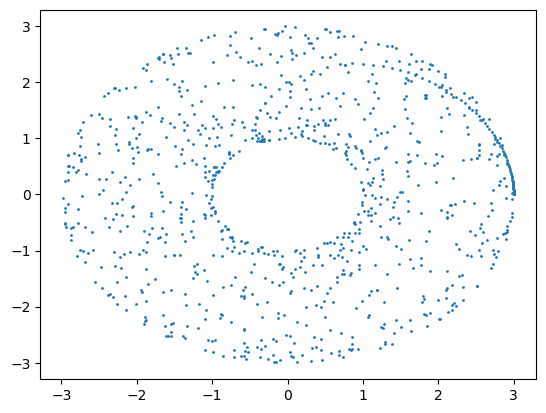

In [96]:
p = fk(res[:, 0], res[:, 1], L1_, L2_)
p = p.reshape((2, len(time)))
plt.scatter(p[0, :], p[1, :], s=1)

(L2*(2*L1*L2*m2*x3*x4**3*sin(x2) - L1*g*(m1 + m2)*cos(x1) - L2*g*m2*cos(x1 + x2) + tau1) + (L1*cos(x2) + L2)*(L1*L2*m2*x3**2*sin(x2) + L2*g*m2*cos(x1 + x2) - tau2))/(L1**2*L2*(m1 + m2\*sin(x2)**2))

(-L2*m2*(L1*cos(x2) + L2)*(2*L1*L2*m2*x3*x4\*\*3*sin(x2) - L1*g*(m1 + m2)*cos(x1) - L2*g*m2*cos(x1 + x2) + tau1) - (L1*L2*m2*x3\*\*2*sin(x2) + L2*g*m2*cos(x1 + x2) - tau2)*(L1**2\*m1 + L1**2*m2 + 2*L1*L2*m2*cos(x2) + L2\*\*2*m2))/(L1**2\*L2**2*m2*(m1 + m2\*sin(x2)\*\*2))
